In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [4]:
from sklearn.metrics import roc_curve,auc

In [33]:
from sklearn.model_selection import train_test_split

In [30]:
dataset = pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
dataset['Species'] = (dataset['Species'] == 'Iris-virginica').astype(int)
dataset['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int32

In [32]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


In [37]:
df = dataset.values
X = df[:,1:5]
Y = df[:,5]
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, train_size=0.8, random_state=50)

In [39]:
print(X_test.shape)
print(Y_test.shape)

(120, 4)
(120,)


In [40]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [46]:
def cost(Y,Y_pred):
    m = Y.shape[0]
    cost = (-1*m) * np.sum(Y*np.log(Y_pred) + (1-Y)*np.log(1-Y_pred))
    return cost

In [49]:
def model(X, Y, lrn, alpha):
    m = X.shape[0]
    n = X.shape[1]
    Y = Y.reshape(1,m)
    X = X.T
    W = np.zeros((1,n))
    B = 0
    costs = []
    for i in range(lrn):
        A = sigmoid(np.dot(W,X) + B)
        cost1 = cost(Y,A)
        costs.append(cost1)

        dw = (1/m)*np.dot(A-Y,X.T)
        db = (1/m)*np.sum(A-Y)

        W = W - alpha*dw
        B = B - alpha*db
        if(i%100 == 0):
            print(i," -- ",cost1)
    return W,B,costs

In [59]:
lrn = 10000
apl = 0.2
W,B,costs = model(X_test,Y_test,lrn,apl)

0  --  83.17766166719343
100  --  26.148438752064784
200  --  20.7589410043353
300  --  17.845414989064096
400  --  15.988151049642664
500  --  14.687339505965177
600  --  13.71770280885038
700  --  12.962211891644607
800  --  12.353829511680052
900  --  11.851274651474178
1000  --  11.427665573188118
1100  --  11.064700019597835
1200  --  10.749456002556407
1300  --  10.472530453394533
1400  --  10.226904247514758
1500  --  10.00722229106442
1600  --  9.809321247606618
1700  --  9.629910582354984
1800  --  9.46635161897407
1900  --  9.31650103588819
2000  --  9.178597791023305
2100  --  9.051179966286204
2200  --  8.933022635381075
2300  --  8.823090768404528
2400  --  8.72050306562529
2500  --  8.624503851921382
2600  --  8.53444099618654
2700  --  8.449748389647091
2800  --  8.369931912903628
2900  --  8.29455810069837
3000  --  8.223244912989529
3100  --  8.15565416538696
3200  --  8.091485277811223
3300  --  8.030470078572618
3400  --  7.972368459652213
3500  --  7.916964723198705

In [60]:
W

array([[-2.66867468, -6.77236171,  5.49856138,  8.87911975]])

In [61]:
B

-5.290046836328535

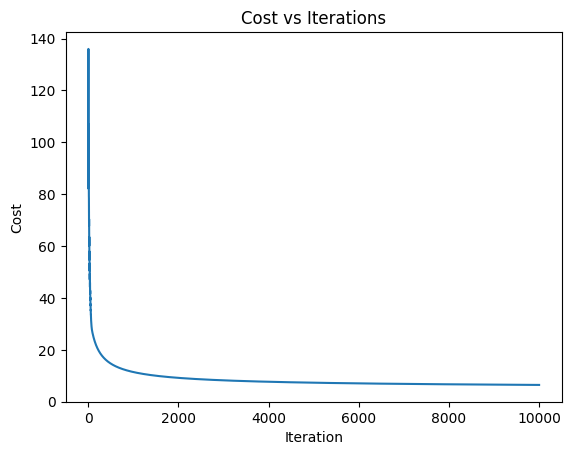

In [62]:
plt.figure()
plt.title("Cost vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.plot(np.arange(lrn),costs)
plt.show()